<a href="https://colab.research.google.com/github/mur457/customer-segmentation/blob/main/Customer_segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(data.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
features=data[["Annual Income (k$)","Spending Score (1-100)"]]

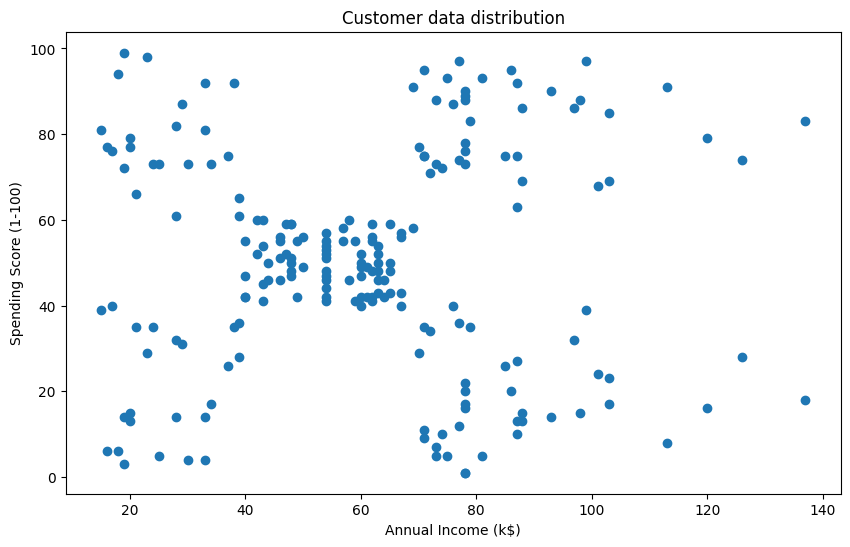

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(features["Annual Income (k$)"],features["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer data distribution")
plt.show()

In [9]:
wcss=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  Kmeans.fit(features)
  wcss.append(Kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

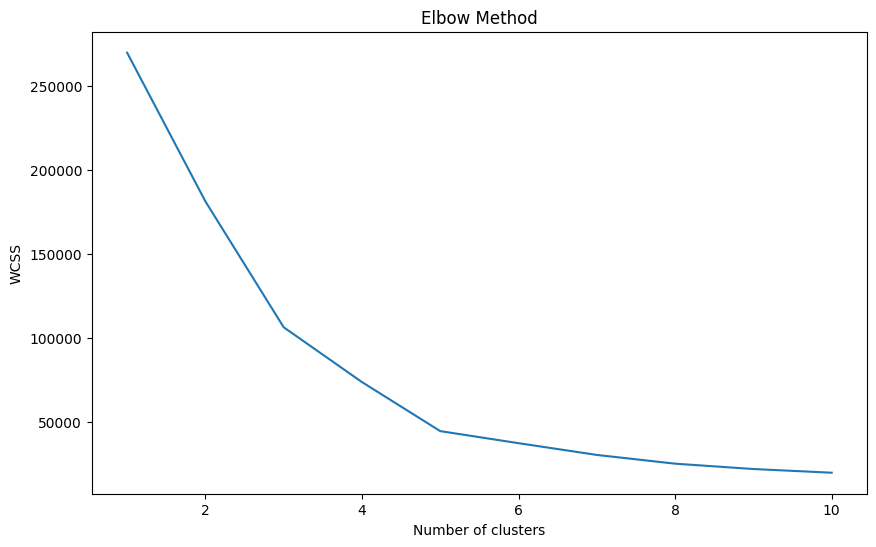

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")

In [11]:
Kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
data['Cluster']=Kmeans.fit_predict(features)

In [13]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1    Male   19                  15                      39        3
1           2    Male   21                  15                      81        4
2           3  Female   20                  16                       6        3
3           4  Female   23                  16                      77        4
4           5  Female   31                  17                      40        3


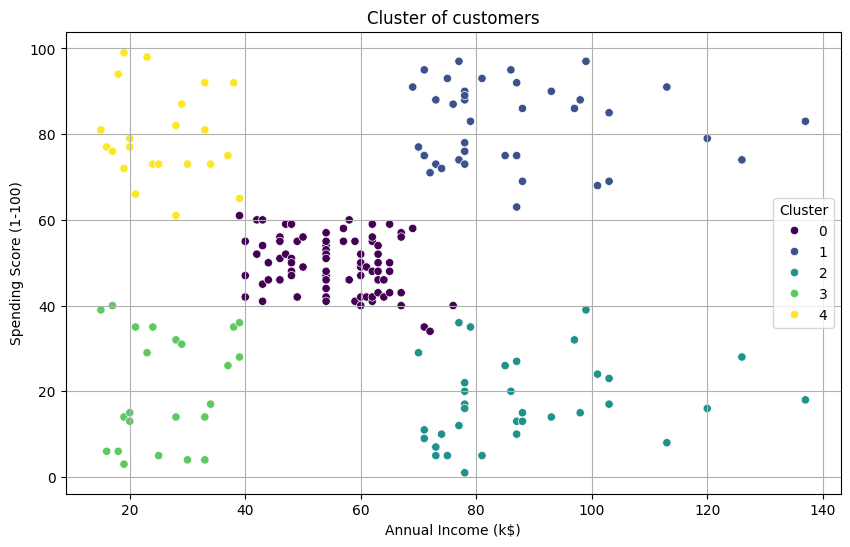

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='viridis',data=data)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Cluster of customers")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()